# Understanding recurrent neural networks

- A major characteristic of all neural networks we have seen so far, such as densely connected networks and convnets, is that they have no **memory**.

- Each input shown to them is processed independently, with no state kept in between inputs.

- With such netwroks, in order to process a sequence or a tempral series of data points, we have to show the entire sequence to the network at once: turn it into a single data point(single large vector) and processed in one go. Such networks are called feedforward networks.

- Biological intelligence processes information incrementally while maintaining an internal model of what it's processing, built from past information and constantly updated as new information comes in.

- A recurrent neural network (RNN) adopts the same principle, albeit in an extremely simplified version: it processes sequences by iterating through the sequence elements and maintaining a **state** containing information relative to what it has seen so far.

- An RNN is a type of neural network that has an internal loop.

- The state of the RNN is reset between procesing two different, independent sequences, So we still consider one sequence a single data point: a single input to the network.

- What changes is that this data point is no longer processed in a single step; rather the network internally loops over sequence elements.

##### A recurrent network: a network with a loop

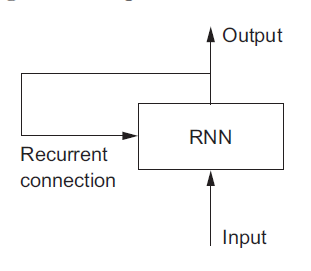

In [ ]:
# Pseudocode RNN

# This RNN takes as input a sequence of vectors, which we will encode as 2D tensor of size (timesteps, input_features)

sate_t = 0    # The state at t.
for input_t in input_sequence:   # Iterates over sequence elements.
    output_t = f(input_t, state_t)
    state_t = output_t   # The previous output becomes the state for the next iteration.


---------------------------------------------------------------------------------------
# More detailed pseudocode for the RNN

sate_t = 0    
for input_t in input_sequence:   
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t 

In [ ]:
# Numpy implementation of a simple RNN
import numpy as np

timesteps = 100   # number of timesteps in the input sequence
input_features = 32  # dimensionality of the input feature space
output_features = 64 # dimensionality of the output feature space

inputs = np.random.random((timesteps, input_features))  # input data: random noise for the sake of the example

state_t = np.zeros((output_features,))  # initial state: an all zero vector

# creates random weight matrices
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:  # input_t is a vector of shape (input_features,)
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)  # combines the input with the current state (the previous output) to obtain the current output
  successive_outputs.append(output_t)
  state_t = output_t   # updates the state of the network for the next timestep

final_output_sequence = np.concatenate(successive_outputs, axis=0)  # The final output is a 2D tensor of shape(timesteps, output_features)

In [ ]:
final_output_sequence

array([0.99999961, 0.99999999, 0.99999996, ..., 1.        , 1.        ,
       1.        ])

- Easy enough: in summary, an RNN is a for loop that reuses quantities computed during the previous iteration of the loop, nothing more.

- This example is one of the simple RNN formulations.

- RNN are characterized by their step function, such as the following function in this case: 

- output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

##### A simple RNN, unrolled over time

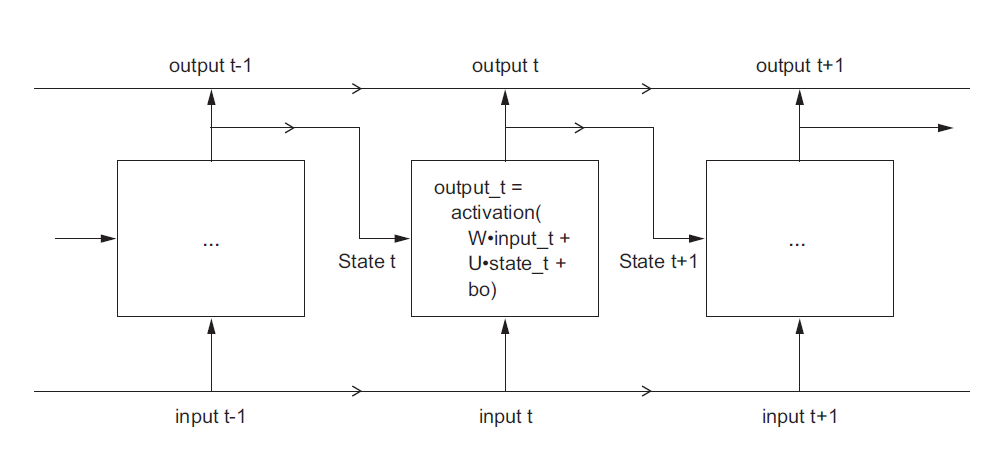

- In this example, the final output is a 2D tensor of shape (timesteps, output_features), where each timesteps is the output of the loop at time t.

- Each timestep t in the output tensor contains information about timesteps 0 to t in the input sequence---about the entire past.

- For this reason, in many cases, we don't need this full sequence of outputs; we just need the last output (output_t at the end of the loop), because it already contains information about the entire sequence.

### A recurrent layer in Keras

- The process we just naively implemented in Numpy corresponds to an actual Keras layer----the SimpleRNN layer:

In [ ]:
from keras.layers import SimpleRNN

- There is one minor difference: SimpleRNN processes batches of sequences, like all other Keras layers, not a single- sequence as in the Numpy example.

- This means it takes inputs of shape (batch_size, timesteps, input_features), rather than (timesteps, input_features).

- Like all recurrent layers in Keras, SimpleRNN can be run in two different modes:
 - It can retrun either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)) or
 - Only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)).
 - These two modes are controlled by the return_sequences construct argument.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# The following example returns the full state sequence:

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- It's sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network.

- In such a setup, we have to get all of the intermediate layers to return full sequence of outputs:

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


- Now, let's use such a model on the IMDB movie-review-classification problem.

In [ ]:
# Preparing the IMDB data

from keras.datasets import imdb
from keras.preprocessing import sequence

max_feature = 1000  # Number of words to consider as features
maxlen = 500        # Cuts off text after this many words 
batch_size = 32

In [ ]:
print('Loading data......')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_feature)

Loading data......
17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(len(input_train), 'train sequences')

25000 train sequences


In [ ]:
print(len(input_test), 'test sequences')

25000 test sequences


In [ ]:
from keras.utils import pad_sequences
print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#### Let's train a simple recurrent network using an Embedding layer and a SimpleRNN layer.

In [ ]:
# Training the model with Embedding and SimpleRNN layers

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_feature, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 26s 154ms/step - loss: 0.6245 - acc: 0.6369 - val_loss: 0.5051 - val_acc: 0.7568
Epoch 2/10
157/157 [==============================] - 27s 173ms/step - loss: 0.4704 - acc: 0.7878 - val_loss: 0.4194 - val_acc: 0.8182
Epoch 3/10
157/157 [==============================] - 35s 221ms/step - loss: 0.4111 - acc: 0.8188 - val_loss: 0.3941 - val_acc: 0.8322
Epoch 4/10
157/157 [==============================] - 32s 202ms/step - loss: 0.3810 - acc: 0.8390 - val_loss: 0.4634 - val_acc: 0.7938
Epoch 5/10
157/157 [==============================] - 22s 141ms/step - loss: 0.3654 - acc: 0.8457 - val_loss: 0.4103 - val_acc: 0.8202
Epoch 6/10
157/157 [==============================] - 31s 195ms/step - loss: 0.3455 - acc: 0.8588 - val_loss: 0.4487 - val_acc: 0.8212
Epoch 7/10
157/157 [==============================] - 45s 286ms/step - loss: 0.3325 - acc: 0.8639 - val_loss: 0.6382 - val_acc: 0.7688
Epoch 8/10
157/157 [==============================] - 2

Now, let's display the training and validation loss and accuracy

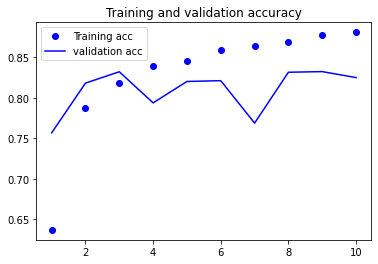

In [ ]:
# Plotting results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.show()

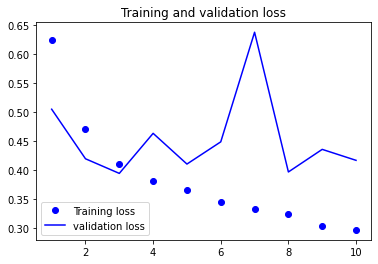

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

- Unfortunately, this small recurrent network doesn't perform well.

- Part of the problem is that our inputs only consider the first 500 words, rather than full sequences---hence, the RNN has access to less information.

- The remainder of the problem is that SimpleRNN isn't good at processing long sequences, such as text.

- other types of recurrent layers perform much better.